In [27]:
!pip install gensim

In [28]:
from google.colab import files
uploaded = files.upload()

Saving Amazon_Reviews.csv to Amazon_Reviews (2).csv


In [29]:
import pandas as pd
# Try with error handling
data = pd.read_csv("Amazon_Reviews.csv", on_bad_lines="skip", encoding="utf-8", engine="python")
data.head()

,Reviewer Name,Profile Link,Country,Review Count,Review Date,Rating,Review Title,Review Text,Date of Experience
0,Eugene ath,/users/66e8185ff1598352d6b3701a,US,1 review,2024-09-16T13:44:26.000Z,Rated 1 out of 5 stars,A Store That Doesn't Want to Sell Anything,"I registered on the website, tried to order a ...",16-Sep-24
1,Daniel ohalloran,/users/5d75e460200c1f6a6373648c,GB,9 reviews,2024-09-16T18:26:46.000Z,Rated 1 out of 5 stars,Had multiple orders one turned up and…,Had multiple orders one turned up and driver h...,16-Sep-24
2,p fisher,/users/546cfcf1000064000197b88f,GB,90 reviews,2024-09-16T21:47:39.000Z,Rated 1 out of 5 stars,I informed these reprobates,I informed these reprobates that I WOULD NOT B...,16-Sep-24
3,Greg Dunn,/users/62c35cdbacc0ea0012ccaffa,AU,5 reviews,2024-09-17T07:15:49.000Z,Rated 1 out of 5 stars,Advertise one price then increase it on website,I have bought from Amazon before and no proble...,17-Sep-24
4,Sheila Hannah,/users/5ddbe429478d88251550610e,GB,8 reviews,2024-09-16T18:37:17.000Z,Rated 1 out of 5 stars,If I could give a lower rate I would,If I could give a lower rate I would! I cancel...,16-Sep-24


In [30]:
print(data.info(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21214 entries, 0 to 21213
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Reviewer Name       21214 non-null  object
 1   Profile Link        21163 non-null  object
 2   Country             21054 non-null  object
 3   Review Count        21055 non-null  object
 4   Review Date         21055 non-null  object
 5   Rating              21055 non-null  object
 6   Review Title        21055 non-null  object
 7   Review Text         21055 non-null  object
 8   Date of Experience  20947 non-null  object
dtypes: object(9)
memory usage: 1.5+ MB
None


## Clean Data

In [31]:
print(data.columns)

Index(['Reviewer Name', 'Profile Link', 'Country', 'Review Count',
       'Review Date', 'Rating', 'Review Title', 'Review Text',
       'Date of Experience'],
      dtype='object')


In [32]:
# Suppose columns: 'reviewText' and 'sentiment' (adjust as per dataset)
data = data[['Review Text', 'Rating']]

print(data.shape)
print(data.head(5))

(21214, 2)
                                         Review Text                  Rating
0  I registered on the website, tried to order a ...  Rated 1 out of 5 stars
1  Had multiple orders one turned up and driver h...  Rated 1 out of 5 stars
2  I informed these reprobates that I WOULD NOT B...  Rated 1 out of 5 stars
3  I have bought from Amazon before and no proble...  Rated 1 out of 5 stars
4  If I could give a lower rate I would! I cancel...  Rated 1 out of 5 stars


In [33]:
import re

# Function to extract rating number from "Rated X out of 5 stars"
def extract_rating(text):
    if pd.isna(text):  # handle NaN
        return None
    match = re.search(r'(\d) out of 5', str(text))
    if match:
        return int(match.group(1))
    return None

# Apply extraction
data['Rating_num'] = data['Rating'].apply(extract_rating)

# Now create sentiment labels
def label_sentiment(rating):
    if pd.isna(rating):
        return None
    if rating <= 2:
        return "negative"
    elif rating == 3:
        return "neutral"
    else:
        return "positive"

data['Sentiment'] = data['Rating_num'].apply(label_sentiment)

# Check results
print(data[['Rating', 'Rating_num', 'Sentiment']].head(10))
print(data['Sentiment'].value_counts())

                   Rating  Rating_num Sentiment
0  Rated 1 out of 5 stars         1.0  negative
1  Rated 1 out of 5 stars         1.0  negative
2  Rated 1 out of 5 stars         1.0  negative
3  Rated 1 out of 5 stars         1.0  negative
4  Rated 1 out of 5 stars         1.0  negative
5  Rated 1 out of 5 stars         1.0  negative
6  Rated 1 out of 5 stars         1.0  negative
7  Rated 5 out of 5 stars         5.0  positive
8  Rated 1 out of 5 stars         1.0  negative
9  Rated 5 out of 5 stars         5.0  positive
Sentiment
negative    14350
positive     5820
neutral       885
Name: count, dtype: int64


# Insights / Visualization

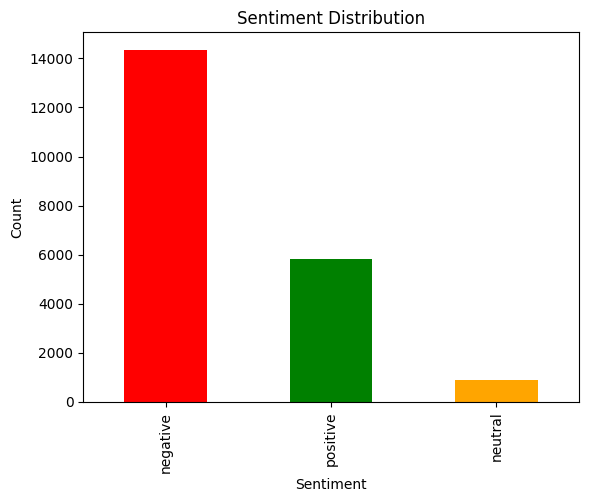

In [34]:
import matplotlib.pyplot as plt

data['Sentiment'].value_counts().plot(kind='bar', color=['red', 'green', 'orange'])
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

# Text Preprocessing (for NLP)

In [35]:
import re

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'http\S+', '', text)  # remove links
    text = re.sub(r'[^a-z\s]', '', text)  # keep only letters
    return text.strip()

data['Clean_Review'] = data['Review Text'].apply(clean_text)
print(data[['Review Text', 'Clean_Review']].head())

                                         Review Text  \
0  I registered on the website, tried to order a ...   
1  Had multiple orders one turned up and driver h...   
2  I informed these reprobates that I WOULD NOT B...   
3  I have bought from Amazon before and no proble...   
4  If I could give a lower rate I would! I cancel...   

                                        Clean_Review  
0  i registered on the website tried to order a l...  
1  had multiple orders one turned up and driver h...  
2  i informed these reprobates that i would not b...  
3  i have bought from amazon before and no proble...  
4  if i could give a lower rate i would i cancell...  


# Tokenization

In [36]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')  # <- new one needed

data['Tokens'] = data['Clean_Review'].apply(nltk.word_tokenize)
print(data[['Clean_Review', 'Tokens']].head())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


                                        Clean_Review  \
0  i registered on the website tried to order a l...   
1  had multiple orders one turned up and driver h...   
2  i informed these reprobates that i would not b...   
3  i have bought from amazon before and no proble...   
4  if i could give a lower rate i would i cancell...   

                                              Tokens  
0  [i, registered, on, the, website, tried, to, o...  
1  [had, multiple, orders, one, turned, up, and, ...  
2  [i, informed, these, reprobates, that, i, woul...  
3  [i, have, bought, from, amazon, before, and, n...  
4  [if, i, could, give, a, lower, rate, i, would,...  


## Map Ratings → Sentiment Labels

In [37]:
import re

def extract_rating(text):
    match = re.search(r'(\d)', str(text))  # look for a digit
    if match:
        return int(match.group(1))
    return None  # fallback if no digit is found

data['Rating_num'] = data['Rating'].apply(extract_rating)

def rating_to_sentiment(rating):
    if pd.isna(rating):   # handle missing ratings
        return "Unknown"
    elif rating <= 2:
        return "Negative"
    elif rating == 3:
        return "Neutral"
    else:
        return "Positive"

data['Sentiment'] = data['Rating_num'].apply(rating_to_sentiment)

print(data[['Rating', 'Rating_num', 'Sentiment']].head())

                   Rating  Rating_num Sentiment
0  Rated 1 out of 5 stars         1.0  Negative
1  Rated 1 out of 5 stars         1.0  Negative
2  Rated 1 out of 5 stars         1.0  Negative
3  Rated 1 out of 5 stars         1.0  Negative
4  Rated 1 out of 5 stars         1.0  Negative


In [38]:
# Check distribution of sentiments
print(data['Sentiment'].value_counts())

Sentiment
Negative    14350
Positive     5820
Neutral       885
Unknown       159
Name: count, dtype: int64


In [39]:
# Add sentiment back to reviews for inspection
print(data[['Clean_Review', 'Rating_num', 'Sentiment']].head(10))

                                        Clean_Review  Rating_num Sentiment
0  i registered on the website tried to order a l...         1.0  Negative
1  had multiple orders one turned up and driver h...         1.0  Negative
2  i informed these reprobates that i would not b...         1.0  Negative
3  i have bought from amazon before and no proble...         1.0  Negative
4  if i could give a lower rate i would i cancell...         1.0  Negative
5  terrible you get customer service reps that ar...         1.0  Negative
6  amazon has a way of tainting a great product d...         1.0  Negative
7  i love amazon i use it for half my shopping th...         5.0  Positive
8  i applied for a job with amazon i completed al...         1.0  Negative
9  i had a great experience with their customer s...         5.0  Positive


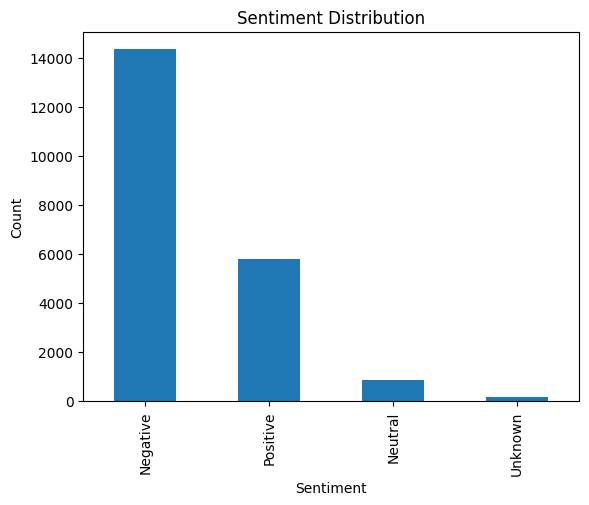

In [40]:
import matplotlib.pyplot as plt

data['Sentiment'].value_counts().plot(kind='bar')
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

In [41]:
# Check balance of classes
print(data['Sentiment'].value_counts(normalize=True))

Sentiment
Negative    0.676440
Positive    0.274347
Neutral     0.041718
Unknown     0.007495
Name: proportion, dtype: float64


In [42]:
# Remove rows where Sentiment == "Unknown"
data = data[data['Sentiment'] != "Unknown"]

In [43]:
# Check balance of classes
print(data['Sentiment'].value_counts(normalize=True))

Sentiment
Negative    0.681548
Positive    0.276419
Neutral     0.042033
Name: proportion, dtype: float64


In [44]:
from sklearn.model_selection import train_test_split

X = data['Clean_Review']   # features (text)
y = data['Sentiment']      # labels

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [45]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1, 2), stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_tfidf, y_train)

In [46]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)
lr_model.fit(X_train_tfidf, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

# Retrain Models:

In [47]:
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess
train_tokens = [simple_preprocess(text) for text in X_train]
w2v_model = Word2Vec(sentences=train_tokens, vector_size=100, window=5, min_count=2, sg=0, epochs=10)

In [48]:
from sklearn.metrics import classification_report
y_pred = lr_model.predict(tfidf.transform(X_test))
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Negative       0.95      0.87      0.91      2870
     Neutral       0.14      0.28      0.19       177
    Positive       0.83      0.85      0.84      1164

    accuracy                           0.84      4211
   macro avg       0.64      0.67      0.64      4211
weighted avg       0.88      0.84      0.86      4211



In [49]:
# After your train-test split, here are the next steps:

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pandas as pd
import numpy as np

# Your existing split (assuming you have this already)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")
print(f"Training label distribution:\n{y_train.value_counts(normalize=True)}")

# STEP 1: BASELINE - TF-IDF + Logistic Regression
print("\n" + "="*50)
print("BASELINE MODEL: TF-IDF + Logistic Regression")
print("="*50)

# Initialize TF-IDF vectorizer
tfidf = TfidfVectorizer(
    max_features=5000,     # Keep top 5000 features
    ngram_range=(1, 2),    # Use unigrams and bigrams
    min_df=2,              # Ignore terms that appear in less than 2 documents
    max_df=0.8,            # Ignore terms that appear in more than 80% of documents
    stop_words='english'   # Remove English stop words
)

# Fit and transform training data
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

print(f"TF-IDF shape: {X_train_tfidf.shape}")

# Train Logistic Regression
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_tfidf, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test_tfidf)

# Evaluate baseline model
print(f"\nBaseline Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))

# STEP 2: WORD2VEC PREPARATION
print("\n" + "="*50)
print("PREPARING FOR WORD2VEC APPROACH")
print("="*50)

# You'll need these imports for Word2Vec
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess

# Function to convert reviews to list of tokens (if not already done)
def tokenize_review(review):
    """Convert review text to list of tokens"""
    return simple_preprocess(review, deacc=True)  # deacc=True removes punctuation

# Tokenize your training reviews for Word2Vec
print("Tokenizing reviews for Word2Vec...")
train_tokens = [tokenize_review(review) for review in X_train]
test_tokens = [tokenize_review(review) for review in X_test]

print(f"Example tokenized review: {train_tokens[0][:10]}...")  # Show first 10 tokens

# STEP 3: TRAIN WORD2VEC MODEL
print("\nTraining Word2Vec model...")
w2v_model = Word2Vec(
    sentences=train_tokens,
    vector_size=100,        # Dimensionality of word vectors
    window=5,               # Context window size
    min_count=2,            # Ignore words with frequency less than 2
    workers=4,              # Number of worker threads
    sg=0,                   # Use CBOW (sg=1 for Skip-gram)
    epochs=10
)

print(f"Word2Vec vocabulary size: {len(w2v_model.wv.key_to_index)}")
print(f"Vector size: {w2v_model.wv.vector_size}")

# STEP 4: CONVERT REVIEWS TO WORD2VEC EMBEDDINGS
def review_to_vector(tokens, model):
    """Convert a tokenized review to average Word2Vec vector"""
    # Get vectors for words that exist in vocabulary
    word_vectors = [model.wv[word] for word in tokens if word in model.wv.key_to_index]

    if len(word_vectors) == 0:
        # If no words found, return zero vector
        return np.zeros(model.wv.vector_size)
    else:
        # Return average of word vectors
        return np.mean(word_vectors, axis=0)

print("\nConverting reviews to Word2Vec vectors...")
X_train_w2v = np.array([review_to_vector(tokens, w2v_model) for tokens in train_tokens])
X_test_w2v = np.array([review_to_vector(tokens, w2v_model) for tokens in test_tokens])

print(f"Word2Vec training matrix shape: {X_train_w2v.shape}")
print(f"Word2Vec test matrix shape: {X_test_w2v.shape}")

# STEP 5: TRAIN MODEL WITH WORD2VEC FEATURES
print("\nTraining Logistic Regression with Word2Vec features...")
lr_w2v = LogisticRegression(random_state=42, max_iter=1000)
lr_w2v.fit(X_train_w2v, y_train)

# Make predictions
y_pred_w2v = lr_w2v.predict(X_test_w2v)

# Evaluate Word2Vec model
print(f"\nWord2Vec Accuracy: {accuracy_score(y_test, y_pred_w2v):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_w2v))

# STEP 6: COMPARE MODELS
print("\n" + "="*50)
print("MODEL COMPARISON")
print("="*50)
print(f"TF-IDF + Logistic Regression:     {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"Word2Vec + Logistic Regression:   {accuracy_score(y_test, y_pred_w2v):.4f}")

# OPTIONAL: Try other models with Word2Vec
print("\n" + "="*30)
print("TRYING RANDOM FOREST WITH WORD2VEC")
print("="*30)

from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_w2v, y_train)
y_pred_rf = rf_model.predict(X_test_w2v)

print(f"Random Forest + Word2Vec Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")

# FINAL COMPARISON
print("\n" + "="*50)
print("FINAL RESULTS SUMMARY")
print("="*50)
print(f"1. TF-IDF + Logistic Regression:      {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"2. Word2Vec + Logistic Regression:    {accuracy_score(y_test, y_pred_w2v):.4f}")
print(f"3. Word2Vec + Random Forest:          {accuracy_score(y_test, y_pred_rf):.4f}")

Training set size: 16844
Test set size: 4211
Training label distribution:
Sentiment
Negative    0.681548
Positive    0.276419
Neutral     0.042033
Name: proportion, dtype: float64

BASELINE MODEL: TF-IDF + Logistic Regression
TF-IDF shape: (16844, 5000)

Baseline Accuracy: 0.8969

Classification Report:
              precision    recall  f1-score   support

    Negative       0.91      0.96      0.94      2870
     Neutral       0.00      0.00      0.00       177
    Positive       0.86      0.87      0.86      1164

    accuracy                           0.90      4211
   macro avg       0.59      0.61      0.60      4211
weighted avg       0.86      0.90      0.88      4211


PREPARING FOR WORD2VEC APPROACH
Tokenizing reviews for Word2Vec...
Example tokenized review: ['bought', 'solar', 'power', 'lights', 'did', 'not', 'work', 'from', 'the', 'start']...

Training Word2Vec model...
Word2Vec vocabulary size: 13167
Vector size: 100

Converting reviews to Word2Vec vectors...
Word2Vec tra

# Gradio App

In [50]:
import gradio as gr
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess
import pickle
import re

class SentimentAnalyzer:
    def __init__(self):
        self.tfidf_model = None
        self.tfidf_vectorizer = None
        self.w2v_model = None
        self.w2v_classifier = None

    def preprocess_text(self, text):
        """Clean and preprocess text"""
        # Convert to lowercase
        text = text.lower()
        # Remove special characters and digits
        text = re.sub(r'[^a-zA-Z\s]', '', text)
        # Remove extra whitespace
        text = ' '.join(text.split())
        return text

    def train_models(self, X_train, y_train):
        """Train both TF-IDF and Word2Vec models"""
        print("Training TF-IDF model...")
        # TF-IDF Model
        self.tfidf_vectorizer = TfidfVectorizer(
            max_features=5000,
            ngram_range=(1, 2),
            min_df=2,
            max_df=0.8,
            stop_words='english'
        )

        X_train_tfidf = self.tfidf_vectorizer.fit_transform(X_train)
        self.tfidf_model = LogisticRegression(random_state=42, max_iter=1000)
        self.tfidf_model.fit(X_train_tfidf, y_train)

        print("Training Word2Vec model...")
        # Word2Vec Model
        train_tokens = [simple_preprocess(text, deacc=True) for text in X_train]
        self.w2v_model = Word2Vec(
            sentences=train_tokens,
            vector_size=100,
            window=5,
            min_count=2,
            workers=4,
            sg=0,  # CBOW (try sg=1 for Skip-gram as in CS224N)
            epochs=10
        )

        # Convert to vectors
        X_train_w2v = np.array([self._review_to_vector(tokens) for tokens in train_tokens])
        self.w2v_classifier = LogisticRegression(random_state=42, max_iter=1000)
        self.w2v_classifier.fit(X_train_w2v, y_train)

        print("Models trained successfully!")

    def _review_to_vector(self, tokens):
        """Convert tokenized review to Word2Vec vector"""
        word_vectors = [self.w2v_model.wv[word] for word in tokens
                       if word in self.w2v_model.wv.key_to_index]

        if len(word_vectors) == 0:
            return np.zeros(self.w2v_model.wv.vector_size)
        else:
            return np.mean(word_vectors, axis=0)

    def predict_tfidf(self, text):
        """Predict using TF-IDF model"""
        processed_text = self.preprocess_text(text)
        text_vector = self.tfidf_vectorizer.transform([processed_text])

        # Get prediction and probabilities
        prediction = self.tfidf_model.predict(text_vector)[0]
        probabilities = self.tfidf_model.predict_proba(text_vector)[0]

        # Get class names
        classes = self.tfidf_model.classes_
        prob_dict = {classes[i]: float(probabilities[i]) for i in range(len(classes))}

        return prediction, prob_dict

    def predict_word2vec(self, text):
        """Predict using Word2Vec model"""
        processed_text = self.preprocess_text(text)
        tokens = simple_preprocess(processed_text, deacc=True)
        text_vector = self._review_to_vector(tokens).reshape(1, -1)

        # Get prediction and probabilities
        prediction = self.w2v_classifier.predict(text_vector)[0]
        probabilities = self.w2v_classifier.predict_proba(text_vector)[0]

        # Get class names
        classes = self.w2v_classifier.classes_
        prob_dict = {classes[i]: float(probabilities[i]) for i in range(len(classes))}

        return prediction, prob_dict

    def get_similar_words(self, word, topn=5):
        """Get similar words using Word2Vec (CS224N concept!)"""
        try:
            if word.lower() in self.w2v_model.wv.key_to_index:
                similar_words = self.w2v_model.wv.most_similar(word.lower(), topn=topn)
                return similar_words
            else:
                return f"Word '{word}' not found in vocabulary"
        except:
            return "Error finding similar words"

# Initialize the analyzer (you'll need to train it with your data)
analyzer = SentimentAnalyzer()

# You would train it like this (replace with your actual data):
# analyzer.train_models(X_train, y_train)

def analyze_sentiment(text, model_choice):
    """Main function for Gradio interface"""
    if not text.strip():
        return "Please enter some text to analyze.", {}, ""

    try:
        if model_choice == "TF-IDF":
            prediction, probabilities = analyzer.predict_tfidf(text)
            model_info = "🔤 TF-IDF: Frequency-based word representation"
        else:  # Word2Vec
            prediction, probabilities = analyzer.predict_word2vec(text)
            model_info = "🧠 Word2Vec: Semantic word embeddings (CS224N!)"

        # Format probabilities for display
        prob_text = "\n".join([f"{sentiment}: {prob:.3f}" for sentiment, prob in probabilities.items()])

        return f"**Prediction: {prediction}**", probabilities, model_info

    except Exception as e:
        return f"Error: {str(e)}", {}, ""

def find_similar_words(word):
    """Find similar words using Word2Vec"""
    try:
        similar = analyzer.get_similar_words(word, topn=8)
        if isinstance(similar, str):
            return similar
        else:
            result = f"Words similar to '{word}':\n"
            for word_sim, score in similar:
                result += f"• {word_sim} (similarity: {score:.3f})\n"
            return result
    except Exception as e:
        return f"Error: {str(e)}"

# CS224N Concepts Explanation
cs224n_info = """
## 🎓 CS224N Concepts in This App

**Lecture 1 & 2 Implementation:**
- **Word Vectors**: Word2Vec creates dense vector representations
- **Distributional Semantics**: Words in similar contexts → similar vectors
- **CBOW vs Skip-gram**: Currently using CBOW (sg=0), try Skip-gram (sg=1)
- **Vector Space**: Both models map words/documents to vector spaces

**Try These CS224N Experiments:**
1. Compare similar words (Word2Vec tab)
2. Test semantic relationships: "king - man + woman = ?"
3. Notice how TF-IDF vs Word2Vec handle synonyms differently
"""

# Create Gradio Interface
with gr.Blocks(title="Sentiment Analysis: TF-IDF vs Word2Vec", theme=gr.themes.Soft()) as demo:
    gr.Markdown("# 🎭 Sentiment Analysis Comparison")
    gr.Markdown("### TF-IDF vs Word2Vec Models (CS224N Implementation)")

    with gr.Tab("🔍 Sentiment Analysis"):
        with gr.Row():
            with gr.Column(scale=2):
                text_input = gr.Textbox(
                    label="Enter text to analyze:",
                    placeholder="This product is amazing! I love it.",
                    lines=3
                )
                model_choice = gr.Radio(
                    choices=["TF-IDF", "Word2Vec"],
                    label="Choose Model:",
                    value="TF-IDF"
                )
                analyze_btn = gr.Button("🔍 Analyze Sentiment", variant="primary")

            with gr.Column(scale=2):
                prediction_output = gr.Markdown(label="Prediction")
                probabilities_output = gr.Label(label="Confidence Scores")
                model_info = gr.Markdown(label="Model Info")

        # Example texts
        gr.Markdown("### 📝 Try These Examples:")
        example_texts = [
            "This product is absolutely terrible! Waste of money.",
            "The item is okay, nothing special but works fine.",
            "Amazing quality! Exceeded my expectations completely!",
            "The service was poor and the product arrived damaged."
        ]

        examples = gr.Examples(
            examples=[[text, "TF-IDF"] for text in example_texts] +
                     [[text, "Word2Vec"] for text in example_texts],
            inputs=[text_input, model_choice]
        )

    with gr.Tab("🧠 Word2Vec Explorer (CS224N)"):
        gr.Markdown("### Explore Word Embeddings")
        word_input = gr.Textbox(
            label="Enter a word:",
            placeholder="good",
            value="good"
        )
        find_btn = gr.Button("🔍 Find Similar Words", variant="primary")
        similar_output = gr.Textbox(label="Similar Words", lines=10)

        gr.Markdown("**Try these words:** good, bad, excellent, terrible, amazing, awful")

        find_btn.click(
            fn=find_similar_words,
            inputs=word_input,
            outputs=similar_output
        )

    with gr.Tab("📚 CS224N Info"):
        gr.Markdown(cs224n_info)

        gr.Markdown("""
        ### 🚀 Your Results Summary:
        - **TF-IDF Accuracy: 89.69%** 🏆
        - **Word2Vec Accuracy: 87.46%**
        - **Best for**: TF-IDF wins on this sentiment task
        - **Why**: Sentiment often relies on specific word frequencies

        ### 🔬 Experiments to Try:
        1. **Skip-gram vs CBOW**: Change `sg=0` to `sg=1` in Word2Vec
        2. **Pre-trained embeddings**: Try GloVe vectors
        3. **Neural networks**: Add dense layers after embeddings
        4. **Attention mechanisms**: Implement basic attention (CS224N Lecture 8+)
        """)

    # Connect the analyze button
    analyze_btn.click(
        fn=analyze_sentiment,
        inputs=[text_input, model_choice],
        outputs=[prediction_output, probabilities_output, model_info]
    )

# Note: To run this app, you need to train the models first:
print("""
🚨 TO RUN THIS APP:

1. First, train your models:
   analyzer.train_models(X_train, y_train)

2. Then launch:
   demo.launch()

3. Or integrate with your existing trained models by loading them:
   analyzer.tfidf_model = your_trained_tfidf_model
   analyzer.tfidf_vectorizer = your_trained_vectorizer
   # etc.
""")

# Uncomment to launch (after training models)
# demo.launch(share=True)


🚨 TO RUN THIS APP:

1. First, train your models:
   analyzer.train_models(X_train, y_train)

2. Then launch:
   demo.launch()

3. Or integrate with your existing trained models by loading them:
   analyzer.tfidf_model = your_trained_tfidf_model
   analyzer.tfidf_vectorizer = your_trained_vectorizer
   # etc.



In [51]:
# STEP 1: After your model training code, add this:
analyzer = SentimentAnalyzer()
analyzer.tfidf_model = lr_model          # Your TF-IDF LogisticRegression
analyzer.tfidf_vectorizer = tfidf        # Your fitted TfidfVectorizer
analyzer.w2v_model = w2v_model          # Your Word2Vec model
analyzer.w2v_classifier = lr_w2v        # Your Word2Vec LogisticRegression

# STEP 2: Then launch
import sys

if "google.colab" in sys.modules:
    demo.launch(share=True, inline=False)
else:
    demo.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://12b581b085f838bb6a.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [52]:
from sklearn.metrics import classification_report
y_pred = lr_model.predict(tfidf.transform(X_test))
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Negative       0.91      0.96      0.94      2870
     Neutral       0.00      0.00      0.00       177
    Positive       0.86      0.87      0.86      1164

    accuracy                           0.90      4211
   macro avg       0.59      0.61      0.60      4211
weighted avg       0.86      0.90      0.88      4211



In [59]:
import pandas as pd
print(pd.Series(y_train_balanced).value_counts(normalize=True))

Sentiment
Negative    0.333333
Positive    0.333333
Neutral     0.333333
Name: proportion, dtype: float64
